In [1]:
# Cell 1
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
# Cell 2
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
# Cell 3
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels))) 
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
# Cell 4
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
# Cell 5
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [8]:
# Cell 6
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [9]:
# Cell 7
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [10]:
# Cell 8
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

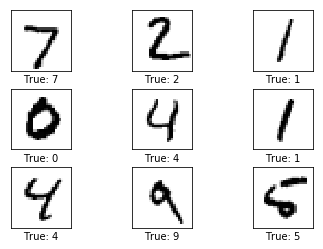

In [11]:
# Cell 9
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [12]:
# Cell 10
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [13]:
# Cell 11
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [14]:
# Cell 12
y_true_cls = tf.placeholder(tf.int64, [None])

In [15]:
# Cell 13
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [16]:
# Cell 14
biases = tf.Variable(tf.zeros([num_classes]))

In [17]:
# Cell 15
logits = tf.matmul(x, weights) + biases

In [18]:
# Cell 16
y_pred = tf.nn.softmax(logits)

In [19]:
# Cell 17
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [20]:
# Cell 18
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)

In [21]:
# Cell 19
cost = tf.reduce_mean(cross_entropy)

In [22]:
# Cell 20
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [23]:
# Cell 21
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [24]:
# Cell 22
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
# Cell 23
session = tf.Session()

In [26]:
# Cell 24
session.run(tf.global_variables_initializer())

In [27]:
# Cell 25
batch_size = 100

In [28]:
# Cell 26
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images. 
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph. # Note that the placeholder for y_true_cls is not set # because it is not used during training. 
        feed_dict_train = {x: x_batch,
                                            y_true: y_true_batch}
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer. 
        session.run(optimizer, feed_dict=feed_dict_train)

In [29]:
# Cell 27
feed_dict_test = {x: data.test.images, y_true: data.test.labels,
                            y_true_cls: data.test.cls}

In [30]:
# Cell 28
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [46]:
# Cell 29
def plot_weights():
    # Get the values for the weights from the TensorFlow variable. 
    w = session.run(weights)
    # Get the lowest and highest values for the weights. # This is used to correct the colour intensity across # the images so they can be compared with each other. 
    w_min = np.min(w)
    w_max = np.max(w)
    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused. 
    fig, axes = plt.subplots(3, 4) 
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots. 
        if i<10:
            # Get the weights for the i'th digit and reshape it. # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)
                                # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i)) 
            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [47]:
# Cell 30
print_accuracy()

Accuracy on test-set: 49.3%


In [48]:
# Cell 31
optimize(num_iterations=1)

In [49]:
# Cell 32
print_accuracy()

Accuracy on test-set: 50.2%


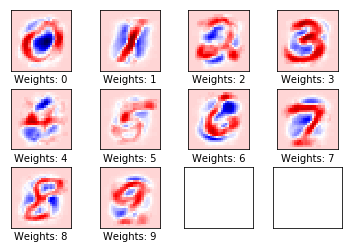

In [50]:
# Cell 33
plot_weights()

In [51]:
# Cell 34
# We have already performed 1 iteration already. 
optimize(num_iterations=999)

In [52]:
# Cell 35
print_accuracy()

Accuracy on test-set: 91.9%


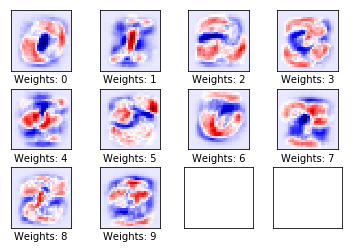

In [53]:
# Cell 36
plot_weights()

In [54]:
# Cell 37
session.close()